**First we will import the libraries**






In [ ]:
import pandas as pd
import numpy as np

**Extract the file in the variable ratings**


In [ ]:
ratings=pd.read_csv("/content/ratings.csv")

**Using .head() to display the first five rows of the dataframe**

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


**Extract the file in movie variabe**

In [ ]:
movies=pd.read_csv("/content/movies.csv")

**Using .head() to display the first five rows of the dataframe**

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Combining ratings and movie data by comparing it on the basis of movie Id**

In [ ]:
movie_data=pd.merge(ratings,movies,on='movieId')
movie_data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1.439474e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1.573939e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,8.307862e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,8.354447e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


**Performing Exploratory Data Analysis(EDA) to find basic information from the dataset.**

In [ ]:
import matplotlib.pyplot as plt #for visualization
import seaborn as sns
sns.set_style('white')
%matplotlib inline

**Creating a ratings dataframe**

In [ ]:
movie_data.groupby('title')['rating'].mean().head()

title
"Great Performances" Cats (1998)    3.541667
#realityhigh (2017)                 3.000000
$ (Dollars) (1971)                  4.000000
$5 a Day (2008)                     3.666667
$9.99 (2008)                        2.666667
Name: rating, dtype: float64

**Sorting the ratings in descending order**

In [ ]:
#sort the avg rating
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
The Black Panthers: Vanguard of the Revolution (2015)    5.0
Rewind (2013)                                            5.0
Class of 1999 (1990)                                     5.0
Love 911 (2012)                                          5.0
Born in the USSR: 7 Up (1991)                            5.0
Name: rating, dtype: float64

**Finding number of ratings for each movie**

In [ ]:
#total no. of ratings
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 3349
Shawshank Redemption, The (1994)    3314
Pulp Fiction (1994)                 3257
Silence of the Lambs, The (1991)    3061
Matrix, The (1999)                  2910
Name: rating, dtype: int64

In [ ]:
#avg ratings with no. of ratings
ratings_mean_count=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
ratings_mean_count.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.541667
#realityhigh (2017),3.000000
$ (Dollars) (1971),4.000000
$5 a Day (2008),3.666667
$9.99 (2008),2.666667


In [ ]:
ratings_mean_count['num of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.541667,12
#realityhigh (2017),3.000000,1
$ (Dollars) (1971),4.000000,1
$5 a Day (2008),3.666667,3
$9.99 (2008),2.666667,3


**Plotting a histogram**

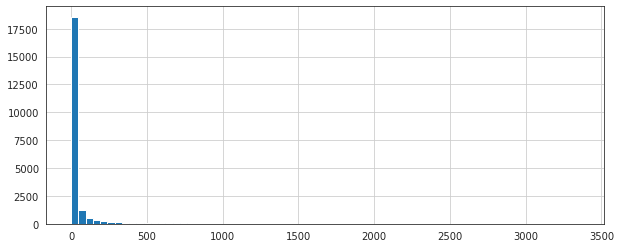

In [ ]:
plt.figure(figsize=(10,4))
ratings_mean_count['num of ratings'].hist(bins=70)

**Plotting another histogram with respect to ratings**
### Most of the people have made a rating of 3.5 followed by 3 and 4.

---



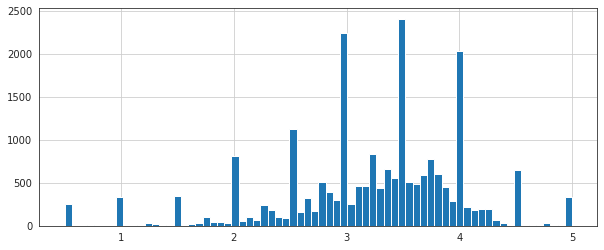

In [ ]:
plt.figure(figsize=(10,4))
ratings_mean_count['rating'].hist(bins=70)

**Creating a joint plot to get the scattered plot and histogram.**

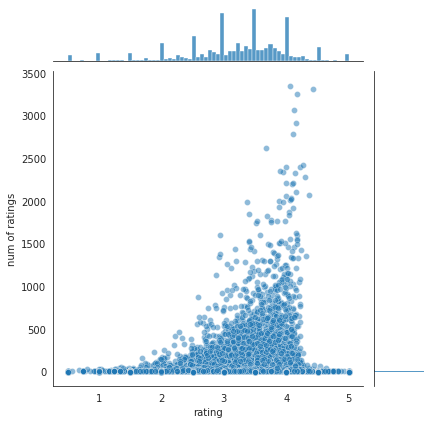

In [ ]:
sns.jointplot(x='rating',y='num of ratings',data=ratings_mean_count,alpha=0.5)

**Creating a pivot table based on user id & title of the movies to recommend similar movies**

In [ ]:
moviemat = movie_data.pivot_table(index='userId',columns='title',values='rating')
moviemat.head()

title,"""Great Performances"" Cats (1998)",#realityhigh (2017),$ (Dollars) (1971),$5 a Day (2008),$9.99 (2008),'71 (2014),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'R Xmas (2001),'Round Midnight (1986),...,Когда зажигаются ёлки (1950),Ландыш серебристый (2000),Мартынко (1987),Мафия (2016),Начальник,Обезьянки и грабители (1985),Он вам не Димон (2017),Приключения Домовёнка (1986),Принцесса и Людоед (1977),Я худею (2018)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Most rated movies in descending order**

In [ ]:
ratings_mean_count.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
title,,
Forrest Gump (1994),4.055240,3349
"Shawshank Redemption, The (1994)",4.434068,3314
Pulp Fiction (1994),4.175775,3257
"Silence of the Lambs, The (1991)",4.123162,3061
"Matrix, The (1999)",4.158419,2910
Star Wars: Episode IV - A New Hope (1977),4.100216,2784
Jurassic Park (1993),3.679036,2614
Schindler's List (1993),4.273554,2420
Braveheart (1995),3.996038,2398


**Extracting the information of most rated movie-Forrest Gump from the pivot table**

In [ ]:
forestgump_user_ratings= moviemat['Forrest Gump (1994)']

forestgump_user_ratings.head()

userId
1    NaN
2    4.5
3    4.0
4    NaN
5    4.0
Name: Forrest Gump (1994), dtype: float64

**Correlating Forrest Gump movies's ratings with other ratings in movie mat/pivot table to get the similar ratings.**

In [ ]:
similar_to_forrestgump = moviemat.corrwith(forestgump_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Cleaning the data by removing the NA values**
### Hence, higher the value of correlation, higher is the chance of it getting recommended to the user

In [ ]:
corr_forrestgump = pd.DataFrame(similar_to_forrestgump,columns=['Correlation'])
corr_forrestgump.dropna(inplace=True)
corr_forrestgump.head()

,Correlation
title,
"""Great Performances"" Cats (1998)",0.249029
$9.99 (2008),-1.000000
'71 (2014),0.230411
'Hellboy': The Seeds of Creation (2004),0.188982
'Round Midnight (1986),1.000000


Now, we will find movies that are perfectly correlated.


In [ ]:
corr_forrestgump.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Я худею (2018),1.0
"Hindenburg, The (1975)",1.0
Love Letter (1995),1.0
Love Is Strange (2014),1.0
Louis Theroux: The Ultra Zionists (2011),1.0
Lost River (2014),1.0
Loser (1991),1.0
Lord Jim (1965),1.0
Loosies (2012),1.0


Selecting movies which have more than 100 reviews.

In [ ]:
corr_forrestgump = corr_forrestgump.join(ratings_mean_count['num of ratings'])
corr_forrestgump.head()

,Correlation,num of ratings
title,,
"""Great Performances"" Cats (1998)",0.249029,12
$9.99 (2008),-1.000000,3
'71 (2014),0.230411,16
'Hellboy': The Seeds of Creation (2004),0.188982,5
'Round Midnight (1986),1.000000,7


Hence, the movies with higher correlation will be recommended first. Here, **Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996)** will be recommended after Forrest Gump as it has the highest correlation.





In [ ]:
corr_forrestgump[corr_forrestgump['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Forrest Gump (1994),1.000000,3349
Don't Be a Menace to South Central While Drinking Your Juice in the Hood (1996),0.556491,109
"Life of David Gale, The (2003)",0.522112,101
Escape from Alcatraz (1979),0.494376,110
Split (2017),0.480983,119


Similarly, we will follow the same steps to check recommended movies for the movie- **"Jumanji"**



In [ ]:
jumanji_user_ratings= moviemat['Jumanji (1995)']
jumanji_user_ratings.head()


userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Jumanji (1995), dtype: float64

In [ ]:
similar_to_jumanji = moviemat.corrwith(jumanji_user_ratings)

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
corr_jumanji = pd.DataFrame(similar_to_jumanji,columns=['Correlation'])
corr_jumanji.dropna(inplace=True)
corr_jumanji.head()

,Correlation
title,
"""Great Performances"" Cats (1998)",1.000000
'71 (2014),-0.338754
'Salem's Lot (2004),0.000000
'Til There Was You (1997),0.349927
"'burbs, The (1989)",0.254859


In [ ]:
corr_jumanji.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
"""Great Performances"" Cats (1998)",1.0
Ju Dou (1990),1.0
Meet the Applegates (1991),1.0
Me and you (io e te) (2012),1.0
"Me You Them (Eu, Tu, Eles) (2000)",1.0
Americathon (1979),1.0
Me Without You (2001),1.0
"Matter of Life and Death, A (Stairway to Heaven) (1946)",1.0
Masquerade (1988),1.0


In [ ]:
corr_jumanji = corr_jumanji.join(ratings_mean_count['num of ratings'])
corr_jumanji.head()

,Correlation,num of ratings
title,,
"""Great Performances"" Cats (1998)",1.000000,12
'71 (2014),-0.338754,16
'Salem's Lot (2004),0.000000,10
'Til There Was You (1997),0.349927,17
"'burbs, The (1989)",0.254859,127


In [ ]:
corr_jumanji[corr_jumanji['num of ratings']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
Jumanji (1995),1.000000,967
Urban Legend (1998),0.685846,102
Mona Lisa Smile (2003),0.682220,104
RoboCop 3 (1993),0.673524,202
Forever Young (1992),0.661875,128


Hence, this movie recommender system shows that **Urban Legend (1998)** will be recommended after Jumanji (1995) followed by **Mona Lisa Smile (2003)**	and **RoboCop 3 (1993).**

---

